In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/airbnb.csv'  # Change this to your actual file path
#df = pd.read_csv(file_path)
df = pd.read_csv(file_path, na_values=['', ' ', 'N/A', 'NA', 'None'])

In [4]:
# Display first 5 rows
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [5]:
# Check data types and non-null counts
df.info()

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

,0
host_name,8
checkin,800
checkout,2450


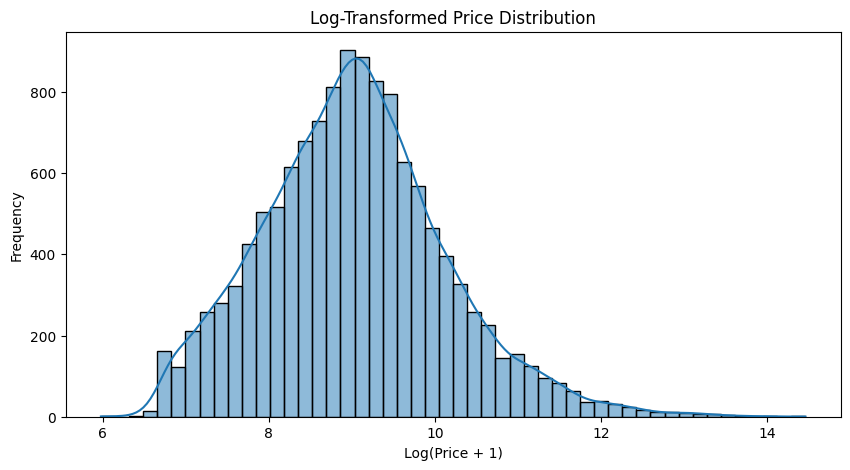

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Apply log transformation to handle large values
df['log_price'] = np.log1p(df['price'])  # log1p to handle values >=0

# Plot the log-transformed price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['log_price'], kde=True, bins=50)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()


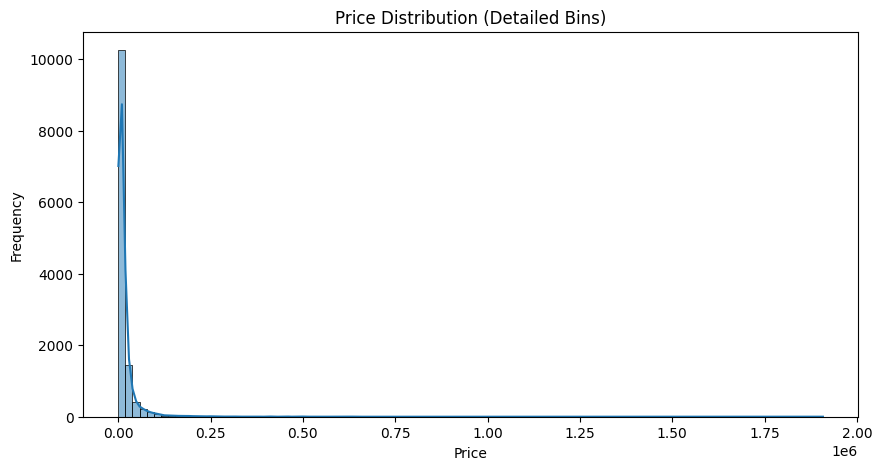

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Price Distribution (Detailed Bins)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

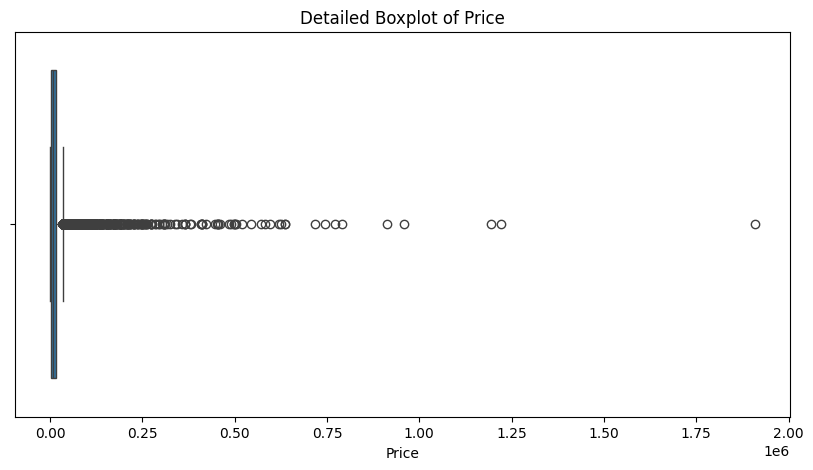

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Detailed Boxplot of Price')
plt.xlabel('Price')
plt.show()

Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
log_price       float64
dtype: object
rating       4238
reviews         0
bathrooms       0
beds            0
guests          0
toiles          0
bedrooms        0
studios         0
price           0
dtype: int64


<ipython-input-9-cbb9a2f8ba0b>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews'].fillna(0, inplace=True)


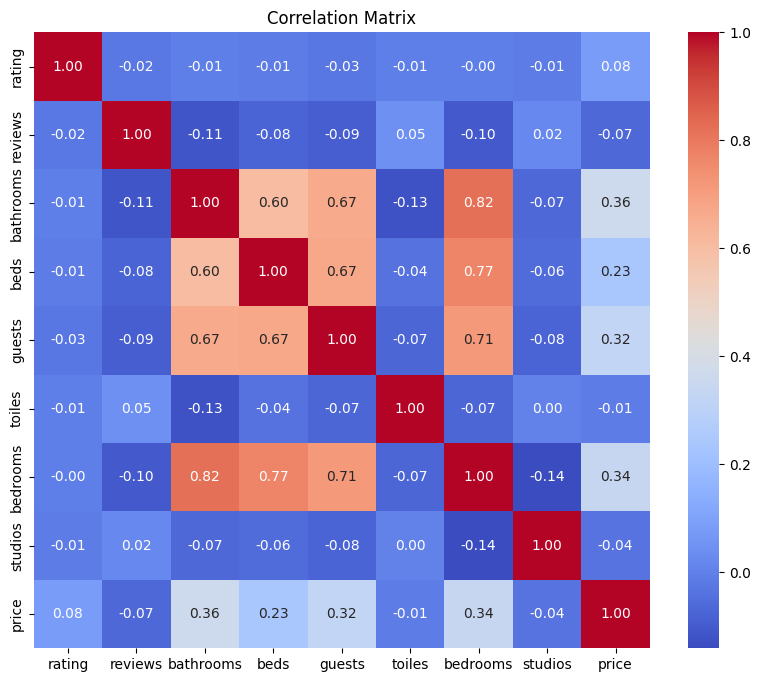

In [9]:
print(df.dtypes)
# dropping rows with missing ratings
df.dropna(subset=['rating'], inplace=True)
# Clean columns that should be numeric (e.g., price, reviews)
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# Ensure 'rating', 'bathrooms', 'beds', 'guests', etc., are in numeric format (if not already)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')
df['guests'] = pd.to_numeric(df['guests'], errors='coerce')
df['toiles'] = pd.to_numeric(df['toiles'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['studios'] = pd.to_numeric(df['studios'], errors='coerce')

# Handling the missing values in the reviews column
df['reviews'].fillna(0, inplace=True)


numerical_features = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios', 'price']
print(df[numerical_features].isnull().sum())  # Check for missing values

corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

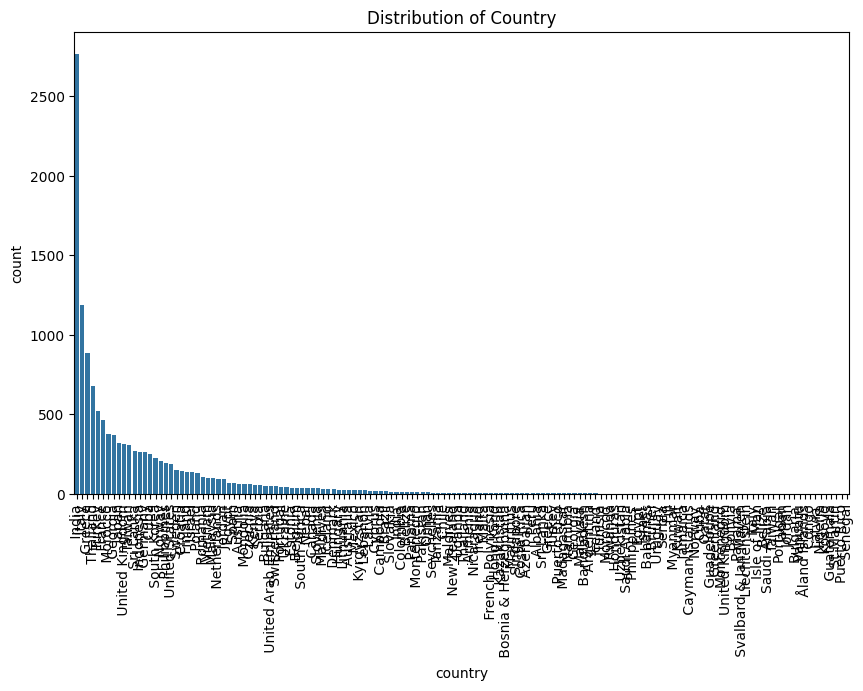

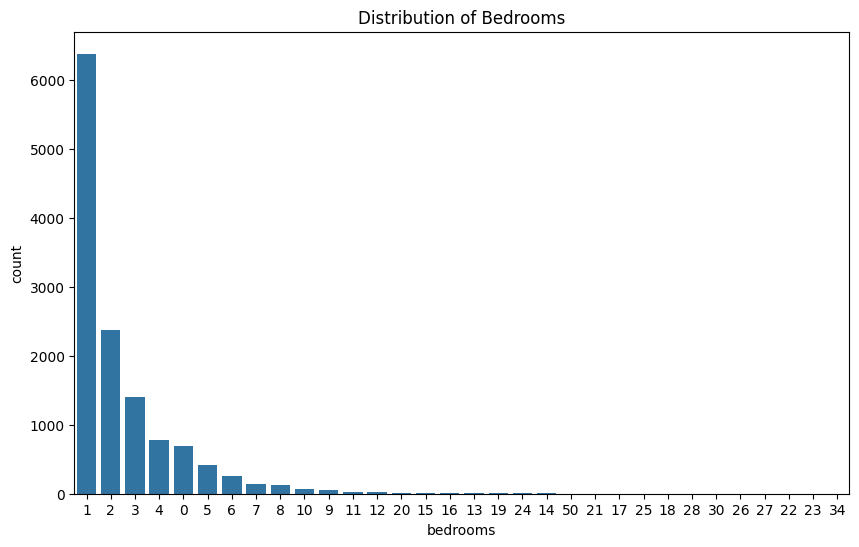

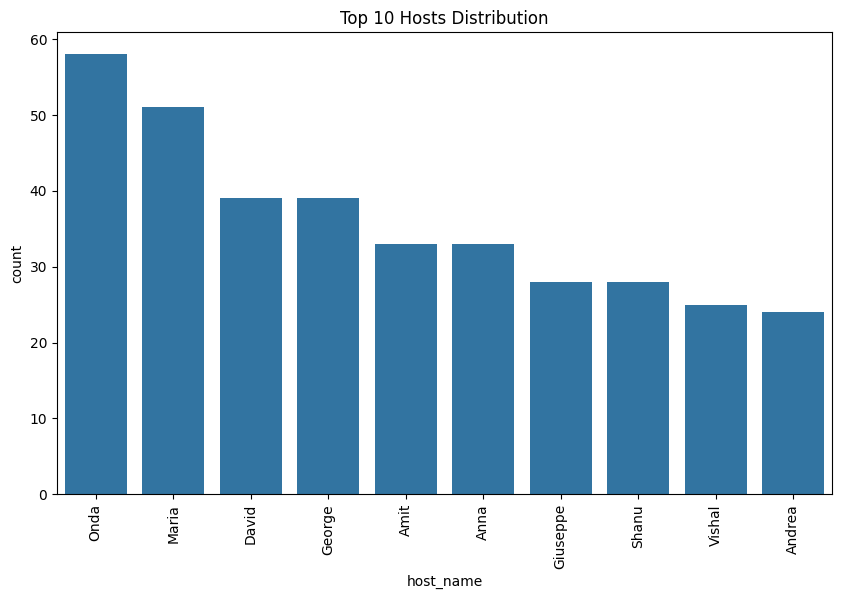

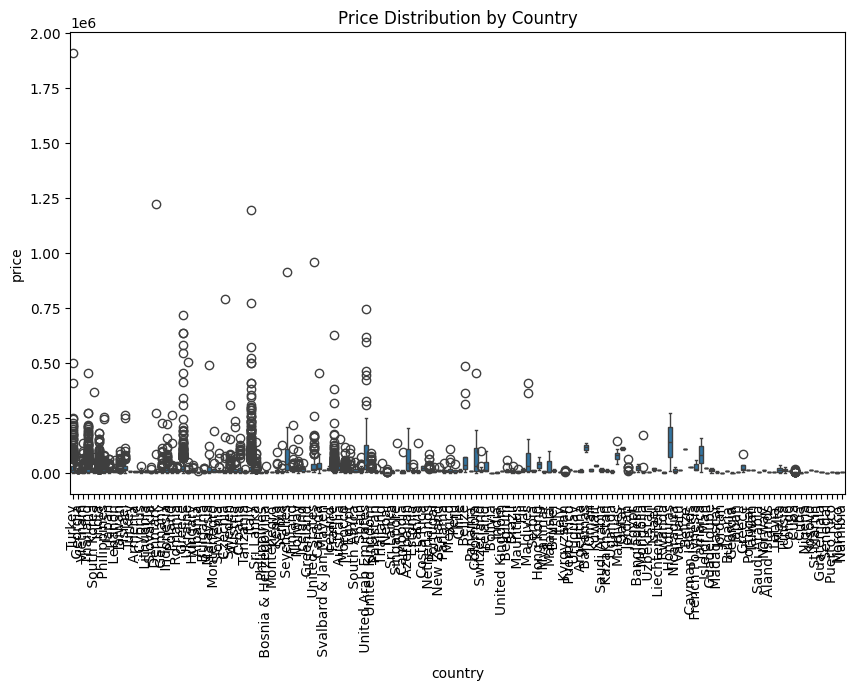

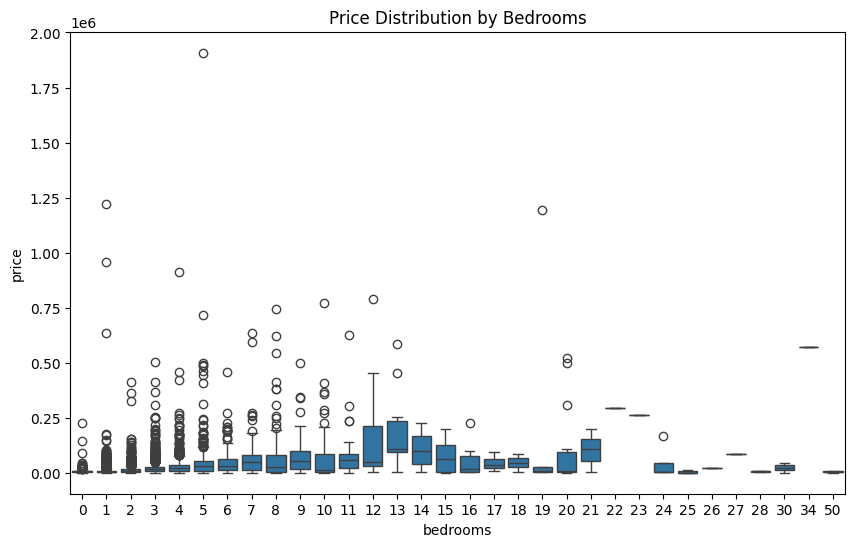

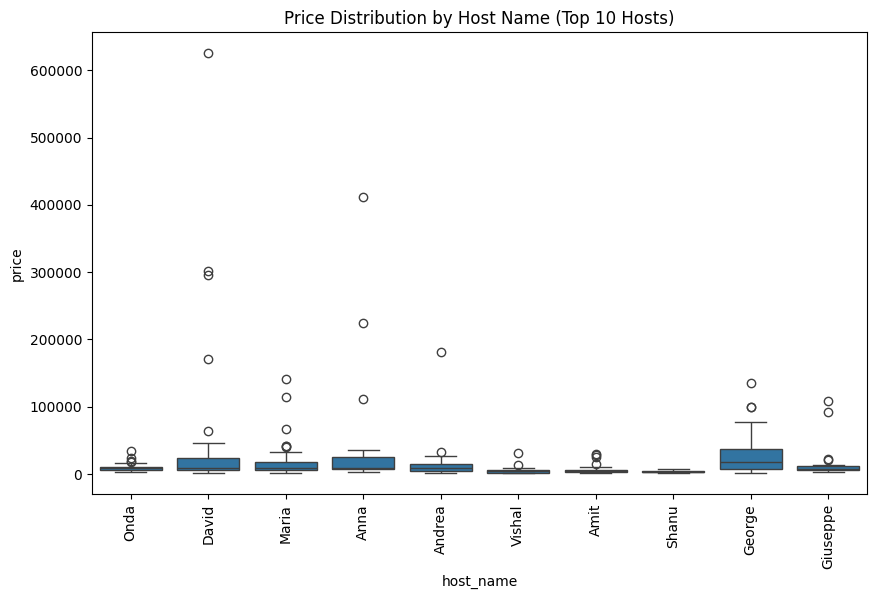

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title('Distribution of Country')
plt.xticks(rotation=90)
plt.show()

# Visualizing 'bedrooms' distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bedrooms', order=df['bedrooms'].value_counts().index)
plt.title('Distribution of Bedrooms')
plt.show()

# Visualizing 'host_name' distribution
top_hosts = df['host_name'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['host_name'].isin(top_hosts)], x='host_name', order=top_hosts)
plt.title('Top 10 Hosts Distribution')
plt.xticks(rotation=90)
plt.show()

# Boxplot for 'price' vs 'country'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='price')
plt.title('Price Distribution by Country')
plt.xticks(rotation=90)
plt.show()

# Boxplot for 'price' vs 'bedrooms'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price Distribution by Bedrooms')
plt.show()

# Boxplot for 'price' vs 'host_name' (Top 10 hosts)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['host_name'].isin(top_hosts)], x='host_name', y='price')
plt.title('Price Distribution by Host Name (Top 10 Hosts)')
plt.xticks(rotation=90)
plt.show()

In [11]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
df.dropna(subset=['price'], inplace=True)

df['reviews'].fillna(df['reviews'].median(), inplace=True)  # Impute missing reviews with median value
df['rating'].fillna(df['rating'].mean(), inplace=True)  # Impute missing ratings with the mean value

# Checking for missing values
missing_values_after = df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)

Missing values in each column:
 Unnamed: 0         0
id                 0
name               0
rating          4238
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
log_price          0
dtype: int64

Missing values after handling:
 Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           

<ipython-input-11-20ac371b02be>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews'].fillna(df['reviews'].median(), inplace=True)  # Impute missing reviews with median value
<ipython-input-11-20ac371b02be>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

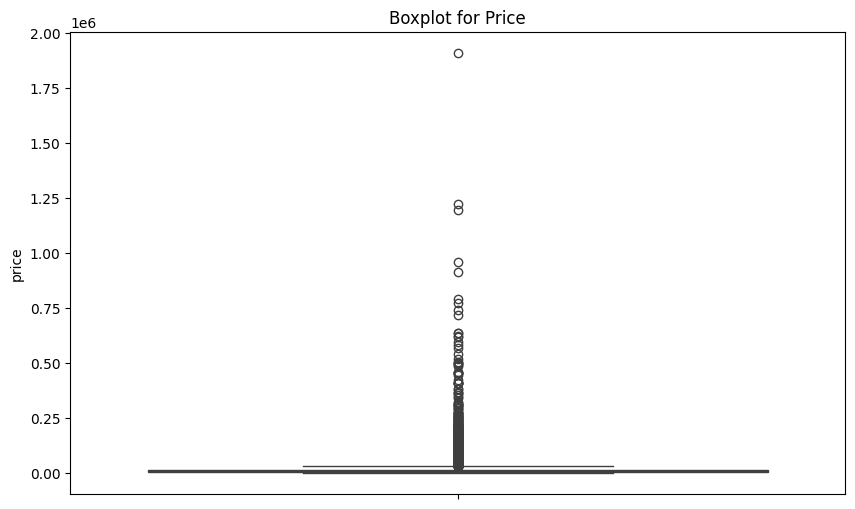

Outliers detected: 1273 rows
Dataset after removing outliers: 11532 rows


In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])
plt.title('Boxplot for Price')
plt.show()

# Detecting outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print(f"Outliers detected: {outliers.shape[0]} rows")
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]
print(f"Dataset after removing outliers: {df.shape[0]} rows")

In [13]:
print("Columns in the DataFrame: ", df.columns)

Columns in the DataFrame:  Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout', 'log_price'],
      dtype='object')


In [14]:
import pandas as pd

# One-hot encode
cols_to_encode = [col for col in ['host_name', 'country'] if col in df.columns]
if cols_to_encode:
    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
else:
    print(f"Skipped encoding: columns {['host_name', 'country']} not found in DataFrame.")
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

sparse_columns = [col for col in df.select_dtypes(include=['number', 'bool']).columns if df[col].sum() == 0]
df.drop(columns=sparse_columns, inplace=True)

print(f"Dropped sparse columns: {sparse_columns}")
print(f"Data shape after encoding and cleanup: {df.shape}")
print(df.head())

Dropped sparse columns: []
Data shape after encoding and cleanup: (11532, 6517)
         id                                               name    rating  \
0  49849504                                     Perla bungalov  4.710000   
1  50891766  Authentic Beach Architect Sheltered Villa with...  4.857475   
2  50699164                                  cottages sataplia  4.850000   
3  49871422                        Sapanca Breathable Bungalow  5.000000   
4  51245886                                      Bungalov Ev 2  4.857475   

   reviews      host_id                   address  \
0     64.0  357334205.0  Kartepe, Kocaeli, Turkey   
1      0.0  386223873.0      Kaş, Antalya, Turkey   
2     68.0  409690853.0          Imereti, Georgia   
3     13.0  401873242.0  Sapanca, Sakarya, Turkey   
4      0.0  414884116.0  Sapanca, Sakarya, Turkey   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 bathroom   
1  4 guests,2 bedrooms,2 beds,2 bathrooms   
2    4 gu

In [15]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check the result
print(f"Scaled numeric columns: {numeric_cols}")
print(df.head())

Scaled numeric columns: ['id', 'rating', 'reviews', 'host_id', 'price', 'bathrooms', 'beds', 'guests', 'toiles', 'bedrooms', 'studios', 'log_price']
         id                                               name    rating  \
0 -0.376641                                     Perla bungalov -1.254538   
1 -0.376641  Authentic Beach Architect Sheltered Villa with...  0.014438   
2 -0.376641                                  cottages sataplia -0.049884   
3 -0.376641                        Sapanca Breathable Bungalow  1.240818   
4 -0.376641                                      Bungalov Ev 2  0.014438   

    reviews   host_id                   address  \
0  0.381242  1.353628  Kartepe, Kocaeli, Turkey   
1 -0.564824  1.558312      Kaş, Antalya, Turkey   
2  0.440372  1.724576          Imereti, Georgia   
3 -0.372654  1.669188  Sapanca, Sakarya, Turkey   
4 -0.564824  1.761371  Sapanca, Sakarya, Turkey   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 bathroom 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor

target_column = 'price'

if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_features = [col for col in X.select_dtypes(include=['object']).columns if col != target_column]
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500))  # MLPRegressor for regression
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"Model R^2 Score: {score:.4f}")

y_pred = model.predict(X_test)

Model R^2 Score: 0.9146


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



R² Score: 0.9146
Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

target_column = 'price'
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_features = [col for col in X.select_dtypes(include=['object']).columns]
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(max_iter=300, random_state=42))  # faster convergence
])

param_grid = {
    'regressor__hidden_layer_sizes': [(64,), (64, 32)],
    'regressor__activation': ['relu', 'tanh'],
    'regressor__learning_rate_init': [0.001, 0.01],
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_small = X_train[:500]
y_small = y_train[:500]

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=4,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

search.fit(X_small, y_small)

print("Best Parameters:", search.best_params_)
print("Best R² Score on small training subset:", search.best_score_)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print("Final R² on Test Set:", r2_score(y_test, y_pred))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'regressor__learning_rate_init': 0.01, 'regressor__hidden_layer_sizes': (64, 32), 'regressor__activation': 'tanh'}
Best R² Score on small training subset: 0.5618286959920185
Final R² on Test Set: 0.6270449967502152


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

X_sample = X.sample(n=5000, random_state=42)
y_sample = y.loc[X_sample.index]

cv_scores = cross_val_score(model, X_sample, y_sample, cv=3, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average R²:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.78970397 0.76609732 0.76411517]
Average R²: 0.7733054834620191


In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

X = df.drop(columns=[target_column])
y = df[target_column]

categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

rf = RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1)  # fewer trees for speed
gb = GradientBoostingRegressor(random_state=42, n_estimators=50)         # fewer trees

rf.fit(X_train_processed, y_train)
gb.fit(X_train_processed, y_train)

rf_preds = rf.predict(X_test_processed)
gb_preds = gb.predict(X_test_processed)
ensemble_preds = (rf_preds + gb_preds) / 2

r2_rf = r2_score(y_test, rf_preds)
r2_gb = r2_score(y_test, gb_preds)
r2_ensemble = r2_score(y_test, ensemble_preds)

print(f"Random Forest R²: {r2_rf:.4f}")
print(f"Gradient Boosting R²: {r2_gb:.4f}")
print(f"Ensemble R²: {r2_ensemble:.4f}")

Random Forest R²: 1.0000
Gradient Boosting R²: 0.9999
Ensemble R²: 1.0000
